### Welcome!

This is a non-comprehensive introduction to images as data in practice. 

We will go over everything you need, but remember that for each step there is much more to learn (as with everything in life) 

- Images as data in python
- pytorch - a NN framework
- dataloaders and prelabelled datasets
- creating your first CNN (maybe?) 
- predicting and optimizing 
- fine-tuning a pre-trained network for your task (transfer learning)

There will be a solution notebook as well so do not worry 

Note that a lot of this is taken from: https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

and some from:
- https://github.com/liketheflower/pytorch_practise/blob/master/cifar/cifar_resnet18_pretrain.py
- https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html


### Images as data in python

What is an image to a computer? The answer is easy, it is a set of matricies with pixel values and that is it. 

We call mutiple matricies "stacked" in each other a tensor, and you can think of it as stacked excelsheets or a cube of tabular data. So where a normal matrix is maybe 64x64 in size, an image will have a third dimension 64x64x3 which we call the "channel" 

For a colored image we have 3 channels - Red, green and blue
for a so-called "grey scale" images there is only 1 channel 

Let us look at that i python a little bit

There are many way to work with images in python, one of the most basic is to simply use matplot.lib

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Show the image of a famous basketball player, located in the directory called img.jpg

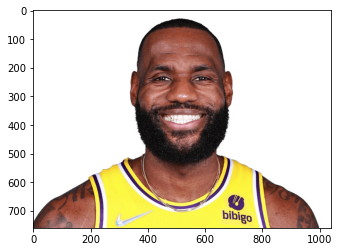

In [2]:
filename = 'img.jpg'
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

Now show the shape and datatype the image object

In [3]:
img.shape

(760, 1040, 3)

In [4]:
img.dtype

dtype('uint8')

- Show only the face of the person - use standard numpy slicing to subset the image, but remember the 3 dimensions
- try to choose one of the color dimensions as well, and see what happens

In [5]:
face = img[30:540,335:700,:]

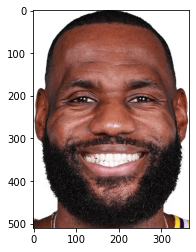

In [6]:
plt.imshow(face)
plt.show()

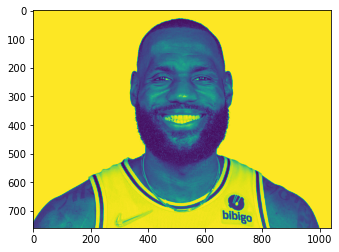

In [7]:
plt.imshow(img[:,:,1])
plt.show()

Easy enough right?

### Pytorch - the cool way to do deep learning 

Working with images in python will most likely lead you to do work with deep learning. To do this we will use the package pytroch. There are many others such Tensorflow and Keras, and pytorch is not the easiest, but it is probably the most widely used. 

Begin by intalling it to you computer. The installation depends on you computer, and on wheter you have a dedicated CUDA graphics card (I sadly do not on my work pc) 

go to: https://pytorch.org/get-started/locally/ and chose you settings 

then run some version of: ```conda install pytorch torchvision torchaudio cpuonly -c pytorch```

Then if all goes well go ahead an ```import torch```

In [8]:
import torch

Just try things out we make a tensor full of zeros 
- use torch.zeros() and give it 3 channels 
- then examine its shape and type 
- then use plt.imshow to display it as and image - can you guess what color it will be? 

Try to make a tensor with 3 channels and random input
- use torch.rand() for this 
- then show the tensor as an image

In [9]:
z = torch.zeros(100, 100,3)
print(z.dtype)

torch.float32


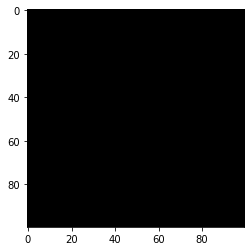

In [10]:
plt.imshow(z)
plt.show()

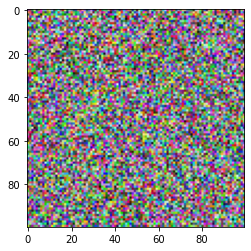

In [11]:
torch.manual_seed(7)
z = torch.rand(100, 100,3)
plt.imshow(z)
plt.show()

### Dataloaders and prelabelled datasets


Luckily we do not have to make our own images :) 

Usually we are interested in images as data because we have some dataset of images that we want to work with. However in this case we will use one of the many availbe dataset from pytorch, that are already labelled 

take a look at what pytorch ships with here: https://pytorch.org/vision/stable/datasets.html


for this exercise we will use the CIFAR-10 dataset, that contrain 60.000 images labelled with 10 labels: airplane, automobile, bird, cat, deep, dog, frog, horse, ship and truck

check it out here: http://www.cs.toronto.edu/~kriz/cifar.html

Not the most useful catagories, but this is just to get a fell for it

------------------------------------------

now lets us download the dataset - may take a little while

In [12]:
import torchvision
from torchvision import transforms


The dataset comes as PIL image objects, so we just need to transform it to torch tensors. We couls also do other transformations, such as normalize etc. - here i have added a normalization to a std of 0.5

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Run the code with download if you need it 

In [14]:
#trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                        download=True)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,transform=transform)


Try to show some of the images 
note: they are 32x32x3 meaning that they will look very granular when shown here'

you can use the ```trainset.data``` method to access the images in the dataset
take a look at the labels as well in ```trainset.targets``` and subset ```trainset.classes``` to translate the number to a label 

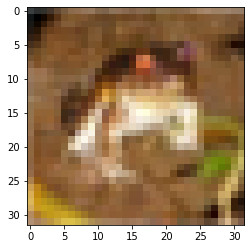

In [15]:
plt.imshow(trainset.data[0])
plt.show()

In [16]:
trainset.classes[trainset.targets[0]]

'frog'

You have now loaded all the data into memory on your machine witch can be a big problem when we have large datasets. We will therefore use a so-called dataloader, that wraps the data and lets us load it is a batch at the time. 

Here we set the batch size to 4 and the amount of worker to 0 - which just means use that it should skip parralel-processing, we also tell it to shuffle the order of the images everytime we go through the entire dataset. However the trainloader will remember whitch label goes with whitc image

In [17]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0)

We then remove the training data from memory, thoug we keep a list of the classes

In [18]:
del trainset

In [19]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

We can now itterate over the trainloader object, and load in a batch of images, equal to the bathc size 

In [20]:
dataiter = iter(trainloader)

In [21]:
images, labels = dataiter.next()

Take a look at the images object shape - anything new? 

In [22]:
images.shape

torch.Size([4, 3, 32, 32])

Using a utils from torch vision to show all the image next to one another 

In [23]:
#make image grid
grid = torchvision.utils.make_grid(images) 

#PIL images are BGR formattet and matplotlib wants RGB so we reverse the R and B dimensions using nump
img = np.transpose(grid, (1, 2, 0))
img = img  / 2 + 0.5 #unnormalize to show image


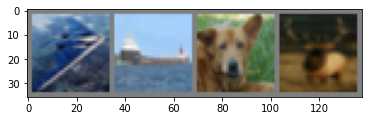

tensor([0, 8, 5, 4])


In [24]:
plt.imshow(img)
plt.show()
print(labels)

Get the actual class labels using the label numbers in the ```labels``` object

In [25]:
labs = [classes[i] for i in labels]

In [26]:
print(labs)

['plane', 'ship', 'dog', 'deer']


### Creating your fist CNN 

That is all cool - but now we want the really cool things, such as labelling images etc. For that we need a Convolutional nerual network (CNN). Now obviously we do not have the time to go into depth with how it works in detail, but let us try some anyway. 

The overall idea, is that you take the image as an input, and perform convolution on it (a mathmatical operation), you then sample the "most important" features of the images, found by the convulution, and create a new a more condensed images - you do this a couple of times as then you use a normal feed forward neural network to make predictions of the label of the image. 

It is trained like any other NN, by using back propagation and a loss funciton. 

Here is a blog that explains nicely what is going on: https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/

- but you should understand if somewhat if you read the readings for today ;)

Defining any NN in pytorch is a 4 step procedure
- define the network as a class. In this class we define the structure in the init function
- define the forward step - what should happend when it sees a new image
- define the loss function and the optimizer (outside of the class) 
- make a training loop where you loop over the data again and again
This part may be a little difficult if you are not familiar with deep learning and object oriented coded but hang in there 

In [27]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [28]:
from sklearn.metrics import accuracy_score


In [29]:
class Net(nn.Module): # diffine a class and have it inherit the NN.module features 
    def __init__(self): #define the init function
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #set the first convolutional layer 
        self.pool = nn.MaxPool2d(2, 2) #define pooling inbetween
        self.conv2 = nn.Conv2d(6, 16, 5) #deine second conv layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120) #deine the first lineary laver - the numbers are the input dim (16*5*5) abd the output - we basically flatten the images
        self.fc2 = nn.Linear(120, 84) # we could add a second linear layer
        self.fc3 = nn.Linear(84, 10) #lsat linear layer - the output NEEDS to be the size of our amount of labels

    def forward(self, x): #the foward step - this is where the magic happens
        #see that the methods applied here, are the ones we defined in the struture!
        
        #first convulutional layer
        x = self.conv1(x) #convulution
        x = F.relu(x) #activation funciton
        x = self.pool(x)  #pooling
        
        #second convulutional layer
        x = self.conv2(x) #convulition layer 2 on the output of the pooling from layer 1
        x = F.relu(x)
        x = self.pool(x) 
        
        #frist linear layer        
        x = x.view(-1, 16 * 5 * 5) #we need to make the image whithc at this point will have the shape of 16x5x5 into a 1xN shaoe
        x = self.fc1(x)
        x = F.relu(x)
        
        #second layer
        x = self.fc2(x)
        x = F.relu(x)
                
        #last / output layer (no activation on this)
        x = self.fc3(x)
        return x


net = Net()

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [31]:
for epoch in range(2):  # loop over the dataset 2 times

    running_loss = 0.0 #we want to zero the loss before the epoch starts (just for us too look at performance, does not do anything)
    running_acc = 0.0
    for i, data in enumerate(trainloader, 0): #looping over the batches
        # get the inputs
        inputs, labels = data #get the images and labels

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs) # predict on the images (forward step)
        running_acc +=  accuracy_score(labels, torch.max(outputs.data, 1)[1]) #calculate minibatch accuracy
        
        loss = criterion(outputs, labels) #calculate our lo     
        loss.backward() #take tangent of hyperplane eg. backproagation
        optimizer.step() #optimize - go down the tangent

        # print statistics
        running_loss += loss.item() #add the running loss 
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000)) #print the mean loss over the lass 2000 bathces
            running_loss = 0.0 #set the running loss to 0 again for the next 2000 batches
            
            print('[%d, %5d] Accuracy: %.3f' %
                  (epoch + 1, i + 1, running_acc/ 2000)) #print the mean loss over the lass 2000 bathces
            running_loss = 0.0 #set the running loss to 0 again for the next 2000 batches
            
            running_acc = 0.0
print('Finished Training')

[1,  2000] loss: 1.841
[1,  2000] Accuracy: 0.323
[1,  4000] loss: 1.568
[1,  4000] Accuracy: 0.426
[1,  6000] loss: 1.489
[1,  6000] Accuracy: 0.460
[1,  8000] loss: 1.444
[1,  8000] Accuracy: 0.478
[1, 10000] loss: 1.377
[1, 10000] Accuracy: 0.501
[1, 12000] loss: 1.339
[1, 12000] Accuracy: 0.521
[2,  2000] loss: 1.262
[2,  2000] Accuracy: 0.553
[2,  4000] loss: 1.259
[2,  4000] Accuracy: 0.549
[2,  6000] loss: 1.233
[2,  6000] Accuracy: 0.566
[2,  8000] loss: 1.247
[2,  8000] Accuracy: 0.550
[2, 10000] loss: 1.208
[2, 10000] Accuracy: 0.574
[2, 12000] loss: 1.241
[2, 12000] Accuracy: 0.561
Finished Training


### predicting and optimizing 

Now we have come to evaluating our model - how does it actually do? 

First let us look at the batch images we examined before, and use the model to predict on them. 

Out model predicts a likelyhood for each class, so we take the ```torch.max()``` of the output to get the most likely class

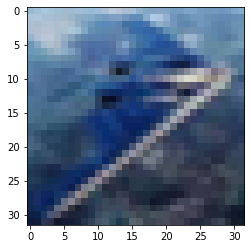

Actual label: plane
Predeicted label: plane


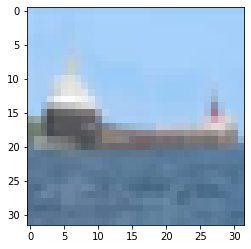

Actual label: ship
Predeicted label: ship


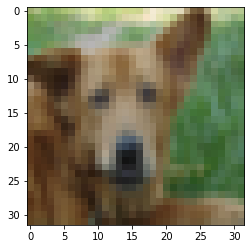

Actual label: dog
Predeicted label: deer


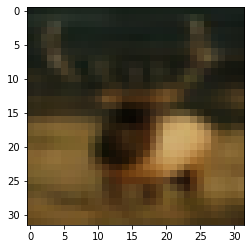

Actual label: deer
Predeicted label: deer


In [32]:
for i,n in enumerate(images):
    img = np.transpose(images[i],(1,2,0))
    img = img / 2 + 0.5 #unnomrlaze for display
    plt.imshow(img)
    plt.show()
    print("Actual label:", labs[i])    
    
    _, predicted = torch.max(net(torch.unsqueeze(images[i], 0)), 1)
    print("Predeicted label:", classes[predicted])

Let us now caulate how many percent of the images we get rigth

In [33]:
true_labs = []
predicted_labs = []

with torch.no_grad(): #important - means that we no longer update our model, we simply evaluate it
    for data in trainloader: #for each bathc in the dataloader
        images, labels = data 
        outputs = net(images) #predict on the images
        _, predicted = torch.max(outputs.data, 1) #take the most likely prediction 
        
        true_labs += labels #save true labels
        predicted_labs += predicted #save predicted labels

print("The training acc. of the model is:", accuracy_score(true_labs, predicted_labs)) #print acc

The training acc. of the model is: 0.60934


How good is the model? remember that with 10 evenly balanced classes - what should the baseline for randomly guessing be? 

Now predictiing on the training data is one thing, but actaully being able to predict new similar data is a whole other thing  - so we use a test dataset, and look at how well we do on that. 

In [34]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [35]:
true_labs_test = []
predicted_labs_test = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        
        true_labs_test += labels
        predicted_labs_test += predicted
print("The test acc. of the model is:",accuracy_score(true_labs_test, predicted_labs_test))

The test acc. of the model is: 0.5813


To optimze the models there are many things that we can change: 
- the structure of the model - in genereal the more complicated the task the more complex the model should be. 10 classes is not a lot, but it is also not trivial. Our model is probably to shallow. It is in general a very small model. State of the art models have 152 convoutional layers (among other things) 
- tinker with the optimizer, activation functions and weight initiations- usualy Adam optimizer and ReLu activations will be the best, but maybe not. Here we do no weight initiations, but this can be very usefull
- change the learning rate and/or allow the model to train for a longer time - probably the most usefull. If you do this be sure to surveil the models performance, also on a validation set along the way (build it into your traning loop)

###  Fine-tuning a pre-trained network for your task (transfer learning)

For this part we will use a state-of-the-art network structure, that has already been trained on some data. It has not been trained on our data however, but it will still perform way better than the model have just made. This is because there is a lot general structure to images, that the CNN can learn from any image set. 

We will use a ResNet structure. The best ResNet is ResNet152, but we will use a smaller one for convinience, and because our task is not as complicated

While we could in theory find any model out there, I am going to be using some of the models already in Pytorch (like you would for NLP with huggingface). However you can read in our own models and intiate the weights with the pretraned wigths. 

In [29]:
from torchvision import models

Load model

In [30]:
model_ft = models.resnet18(pretrained=True)


We can then add an extra outputlayer to match our output need

In [31]:

num_ftrs = model_ft.fc.in_features #output size of the final layer
model_ft.fc = nn.Linear(num_ftrs, 10) #create a new output layer with the amount og features that fit waht i need


Let us look at the model structure here - notice the last layer :)

In [32]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
from tqdm import tqdm

Let us see the performance of the model as is - it will be a bit slower, as the model is WAY bigger, meaning that everything takes a long time to pass though. 

On a GPU this is not a big issue,

Do not run this if you do not want it to run for a few minuts

In [34]:
m = nn.Upsample(scale_factor=8) #the images are a bit to small for the resnet, so I upsample them to better match what resnet was trained on


In [41]:
true_labs = []
predicted_labs = []

with torch.no_grad(): #important - means that we no longer update our model, we simply evaluate it
    for data in tqdm(trainloader): #for each bathc in the dataloader
        images, labels = data 
        images = m(images)
        outputs = model_ft(images) #predict on the images
        _, predicted = torch.max(outputs.data, 1) #take the most likely prediction 
        
        true_labs += labels #save true labels
        predicted_labs += predicted #save predicted labels

print("The training acc. of the model is:", accuracy_score(true_labs, predicted_labs)) #print acc

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [10:20<00:00, 20.14it/s]


The training acc. of the model is: 0.09364


In [42]:
true_labs_test = []
predicted_labs_test = []

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        images = m(images)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        
        true_labs_test += labels
        predicted_labs_test += predicted
        
print("The test acc. of the model is:",accuracy_score(true_labs_test, predicted_labs_test))

100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [02:04<00:00, 20.14it/s]


The test acc. of the model is: 0.0906


It is npt better than random - and of course it is not, it does not know our data. So let us do some training 

There are many ways of doing this - we can either try to fine tune the full network or instead "freeze" the network weghts and only train the last layer that we have just added. Both are valid, and in general training the full net will give a better model but will also take WAY LONGER especially on a CPU. 

Let us try to freeze the parameters

In [40]:
model_ft = models.resnet18(pretrained=True) #read om the model

for param in model_ft.parameters(): #freeze the layers
    param.requires_grad = False

num_ftrs = model_ft.fc.in_features #output size of the final layer
model_ft.fc = nn.Linear(num_ftrs, 10) #add the last layer - not frozen


Define the loss and optimizer

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model_ft.parameters()), lr=0.001) #only update the parameters that are to be updated

for training reasons i define some new trainloaders with more workers on the CPU and larger batch size


In [42]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=6)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=6)

Files already downloaded and verified


In [43]:
del trainset
del testset

Run the training loop with the new model, optimizers and criterion - on a CPU this takes HOURS!



In [44]:
for epoch in range(2):  # loop over the dataset 2 times

    running_loss = 0.0 #we want to zero the loss before the epoch starts (just for us too look at performance, does not do anything)
    running_acc = 0.0
    for i, data in enumerate(trainloader, 0): #looping over the batches
        # get the inputs
        inputs, labels = data #get the images and labels
        inputs = m(inputs)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model_ft(inputs) # predict on the images (forward step)
        running_acc +=  accuracy_score(labels, torch.max(outputs.data, 1)[1]) #calculate minibatch accuracy
        
        loss = criterion(outputs, labels) #calculate our lo     
        loss.backward() #take tangent of hyperplane eg. backproagation
        optimizer.step() #optimize - go down the tangent

        # print statistics
        running_loss += loss.item() #add the running loss 
        print("{} out of {} batches".format(i,50000/16),end = "\r")
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000)) #print the mean loss over the lass 2000 bathces
            running_loss = 0.0 #set the running loss to 0 again for the next 2000 batches
            
            print('[%d, %5d] Accuracy: %.3f' %
                  (epoch + 1, i + 1, running_acc/ 1000)) #print the mean loss over the lass 2000 bathces
            running_loss = 0.0 #set the running loss to 0 again for the next 2000 batches
            
            running_acc = 0.0
print('Finished Training')

[1,  1000] loss: 1.165hes
[1,  1000] Accuracy: 0.609
[1,  2000] loss: 0.900ches
[1,  2000] Accuracy: 0.692
[1,  3000] loss: 0.883ches
[1,  3000] Accuracy: 0.694
[2,  1000] loss: 0.841hess
[2,  1000] Accuracy: 0.713
[2,  2000] loss: 0.840ches
[2,  2000] Accuracy: 0.710
[2,  3000] loss: 0.838ches
[2,  3000] Accuracy: 0.710
Finished Training0 batches


let us test out the new model on the training and test data 

In [46]:
true_labs = []
predicted_labs = []

with torch.no_grad(): #important - means that we no longer update our model, we simply evaluate it
    for data in tqdm(trainloader): #for each bathc in the dataloader
        images, labels = data 
        images = m(images)
        outputs = model_ft(images) #predict on the images
        _, predicted = torch.max(outputs.data, 1) #take the most likely prediction 
        
        true_labs += labels #save true labels
        predicted_labs += predicted #save predicted labels

print("The training acc. of the model is:", accuracy_score(true_labs, predicted_labs)) #print acc

100%|████████████████████████████████████████████████████████████████████████████| 3125/3125 [1:03:13<00:00,  1.21s/it]


The training acc. of the model is: 0.72342


In [47]:
true_labs_test = []
predicted_labs_test = []

with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        images = m(images)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        
        true_labs_test += labels
        predicted_labs_test += predicted
        
print("The test acc. of the model is:",accuracy_score(true_labs_test, predicted_labs_test))

100%|████████████████████████████████████████████████████████████████████████████████| 625/625 [13:17<00:00,  1.28s/it]


The test acc. of the model is: 0.708


In [51]:
torch.save(model_ft.state_dict(), "./model")

A lot better than our own model, with only training an added layer for 2 epochs. Imagine if you trained the full model 

Over and out! Good luck on your work with images as data 

### Extra: loading and saving models

In [54]:
model = models.resnet18(pretrained=True) #create a similar model
num_ftrs = model.fc.in_features  #still doing that 
model.fc = nn.Linear(num_ftrs, 10)  #still doing that 


model.load_state_dict(torch.load("./model")) #fill the model with the trained paramters etc.
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  